In [1]:
#explore data
import numpy as np
import pandas as pd

happiness=pd.read_csv("happiness_data/happiness_train_complete.csv",  encoding='ISO-8859-1')#change encoding to read chinese
print(happiness.shape)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
happiness.head()

(8000, 140)


,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015/8/4 14:18,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015/7/21 15:04,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015/7/21 13:24,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015/7/25 17:33,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015/8/10 9:50,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


In [2]:
#process missing values

def findMissing(data):
    missings=[]
    for column in data.columns:
        if data[column].isnull().sum()>0:
            missings.append(column)
            print(column+": "+str(data[column].isnull().sum()))
    return missings  
            
missings=findMissing(happiness)

for missing in missings:
    happiness[missing]=happiness[missing].fillna(0)

#drop not that important columns with too many missing values
happiness=happiness.drop("edu_other",axis=1)
happiness=happiness.drop("join_party",axis=1)
happiness=happiness.drop("invest_other",axis=1)
happiness=happiness.drop("property_other",axis=1)

# missing value-- fill in a different value
happiness["edu_status"]=happiness["edu_status"].fillna(4)
happiness["edu_yr"]=happiness["edu_yr"].fillna(happiness["edu_yr"].median())
happiness["family_income"]=happiness["family_income"].fillna(happiness["family_income"].median())
happiness["hukou_loc"]=happiness["hukou_loc"].fillna(1)

findMissing(happiness)

edu_other: 7997
edu_status: 1120
edu_yr: 1972
join_party: 7176
property_other: 7934
hukou_loc: 4
social_neighbor: 796
social_friend: 796
work_status: 5049
work_yr: 5049
work_type: 5049
work_manage: 5049
family_income: 1
invest_other: 7971
minor_child: 1066
marital_1st: 828
s_birth: 1718
marital_now: 1770
s_edu: 1718
s_political: 1718
s_hukou: 1718
s_income: 1718
s_work_exper: 1718
s_work_status: 5435
s_work_type: 5435


[]

In [3]:
#-1 = 不适用; -2 = 不知道; -3 = 拒绝回答; -8 = 无法回答;
#change negative values to median 

print(happiness["happiness"].unique())
happiness=happiness.drop("survey_time",axis=1)
for column in happiness.columns:
    happiness[column]=happiness[column].replace(-8,happiness[column].median())
    happiness[column]=happiness[column].replace(-1,happiness[column].median())
    happiness[column]=happiness[column].replace(-2,happiness[column].median())
    happiness[column]=happiness[column].replace(-3,happiness[column].median())
print(happiness["happiness"].unique())

[ 4  5  2  3  1 -8]
[4 5 2 3 1]


In [4]:
#more data processing

#add age
happiness["age"]=2015-happiness["birth"]
happiness["ageItv"]=pd.cut(happiness["age"],10)#base on frequency
print(happiness[["ageItv","happiness"]].groupby(["ageItv"]).mean())
happiness.loc[happiness["age"]<33.2, "age"]=1
happiness.loc[(happiness["age"]>=33.2) & (happiness['age']<40.8), "age"]=2
happiness.loc[(happiness["age"]>=40.8) & (happiness['age']<56), "age"]=3
happiness.loc[(happiness["age"]>=56) & (happiness['age']<86.4), "age"]=4
happiness.loc[(happiness["age"]>=86.4), "age"]=5

#media
happiness["media"]=happiness["media_1"]+happiness["media_2"]\
+happiness["media_3"]+happiness["media_4"]+happiness["media_5"]+happiness["media_6"]
happiness["media"]=(happiness["media"]/6).astype(int)

#leisure
happiness["leisure"]=happiness["leisure_1"]+happiness["leisure_2"]+happiness["leisure_3"]+happiness["leisure_4"]\
+happiness["leisure_5"]+happiness["leisure_6"]+happiness["leisure_7"]+happiness["leisure_8"]+happiness["leisure_9"]\
+happiness["leisure_10"]+happiness["leisure_11"]+happiness["leisure_12"]
happiness["leisure"]=(happiness["leisure"]/6).astype(int)


                happiness
ageItv                   
(17.924, 25.6]   3.983965
(25.6, 33.2]     3.900000
(33.2, 40.8]     3.874413
(40.8, 48.4]     3.786265
(48.4, 56.0]     3.747402
(56.0, 63.6]     3.856140
(63.6, 71.2]     3.958293
(71.2, 78.8]     3.908911
(78.8, 86.4]     3.968153
(86.4, 94.0]     4.076923


In [5]:
#income
happiness["incomeItv"]=pd.qcut(happiness["income"],5)
print(happiness[["incomeItv","happiness"]].groupby(["incomeItv"]).mean())
happiness.loc[happiness["income"]<2000,"income"]=0
happiness.loc[(happiness["income"]>=2000) & (happiness["income"]<11000),"income"]=1
happiness.loc[(happiness["income"]>=11000) & (happiness["income"]<21600),"income"]=2
happiness.loc[(happiness["income"]>=21600) & (happiness["income"]<40000),"income"]=3
happiness.loc[happiness["income"]>=40000,"income"]=4
                                                                                                                      
                                                                                                                    

                      happiness
incomeItv                      
(-0.001, 2000.0]       3.810641
(2000.0, 11000.0]      3.747095
(11000.0, 21600.0]     3.843593
(21600.0, 40000.0]     3.947280
(40000.0, 9999990.0]   3.992221


In [6]:
#service
happiness["service"]=(happiness["public_service_1"])*0.116812+(happiness["public_service_2"])*0.134496\
+(happiness["public_service_3"])* 0.151543+(happiness["public_service_4"])*0.148457\
+(happiness["public_service_5"])*0.150249+(happiness["public_service_6"])*0.178763\
+(happiness["public_service_7"])*0.182061+(happiness["public_service_8"])*0.133530\
+(happiness["public_service_9"])*0.143565
happiness["service"]=(happiness["service"]).astype(int)
happiness["service"].head()

0     61
1    100
2    111
3    112
4     66
Name: service, dtype: int64

In [7]:
#trust
happiness["trust"]=(happiness["trust_1"])*0.108767+(happiness["trust_2"])*0.104523+(happiness["trust_3"])*0.103970\
+(happiness["trust_4"])*0.078692+(happiness["trust_5"])*0.121807+(happiness["trust_6"])*0.117023\
+(happiness["trust_7"])*0.082881+(happiness["trust_8"])*0.111849+(happiness["trust_9"])*0.072022\
+(happiness["trust_10"])*0.098690+(happiness["trust_11"])*0.025237+(happiness["trust_12"])*0.098664\
+(happiness["trust_13"])*0.056928
happiness["trust"]=(happiness["trust"]*5).astype(int)
happiness["trust"].head()

0    19
1    20
2    17
3    20
4    20
Name: trust, dtype: int64

In [8]:
for i in range(1,14):
    string="trust_"+str(i)
    happiness=happiness.drop(string, axis=1)
for i in range(1,10):
    string="public_service_"+str(i)
    happiness=happiness.drop(string, axis=1)
for i in range(1,7):
    string="media_"+str(i)
    happiness=happiness.drop(string, axis=1)
for i in range(1,13):
    string="leisure_"+str(i)
    happiness=happiness.drop(string, axis=1)
happiness=happiness.drop("ageItv",axis=1)
happiness=happiness.drop("incomeItv",axis=1)
happiness=happiness.drop("birth",axis=1)
print(happiness.shape)

(8000, 99)


In [49]:
#correlation matrix to find useful features
cor=happiness.corr()
features=cor.nlargest(30,"happiness")["happiness"]
print(features)

happiness               1.000000
depression              0.323550
family_status           0.306761
class                   0.298360
equity                  0.287293
class_10_after          0.258327
health                  0.247995
health_problem          0.215023
service                 0.184430
class_10_before         0.158833
trust                   0.149213
view                    0.128043
media                   0.126600
relax                   0.125626
learn                   0.122205
s_edu                   0.112325
class_14                0.105241
edu                     0.099972
house                   0.095724
income                  0.092634
political               0.090321
weight_jin              0.085778
s_hukou                 0.085191
socialize               0.083571
s_political             0.080387
hukou                   0.072961
socia_outing            0.068742
f_edu                   0.064420
m_edu                   0.062160
neighbor_familiarity    0.061093
Name: happ

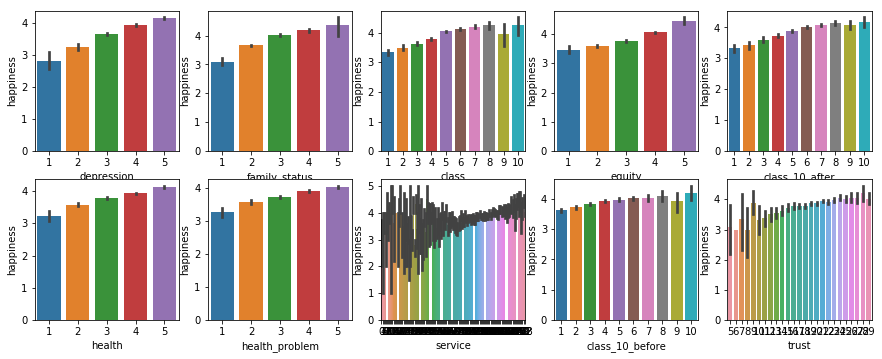

In [95]:
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
i=1
for feature in features[1:11].index:
    plt.subplot(5,5,i)
    sns.barplot(x=feature, y="happiness", data=happiness)
    i+=1


In [50]:
predictors=list(features[1:].index)
predictors

['depression',
 'family_status',
 'class',
 'equity',
 'class_10_after',
 'health',
 'health_problem',
 'service',
 'class_10_before',
 'trust',
 'view',
 'media',
 'relax',
 'learn',
 's_edu',
 'class_14',
 'edu',
 'house',
 'income',
 'political',
 'weight_jin',
 's_hukou',
 'socialize',
 's_political',
 'hukou',
 'socia_outing',
 'f_edu',
 'm_edu',
 'neighbor_familiarity']

In [58]:
# GB model
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(happiness[predictors], happiness["happiness"], test_size=0.2)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

GBclf=GradientBoostingClassifier(n_estimators=300)
GBclf.fit(X_train, y_train)
GBpred=GBclf.predict(X_test)

for i in GBpred:
    if i>5:
        i=5
    if i<1:
        i=1

     
print("Gradient Boosting accuracy is "+str(accuracy_score(GBpred,y_test)))

Gradient Boosting accuracy is 0.634375


In [59]:
#clean test data
test=pd.read_csv("happiness_data/happiness_test_complete.csv",  encoding='ISO-8859-1')

missings=findMissing(test)

for missing in missings:
    test[missing]=test[missing].fillna(0)

#drop not that important columns with too many missing values
test=test.drop("edu_other",axis=1)
test=test.drop("join_party",axis=1)
test=test.drop("invest_other",axis=1)
test=test.drop("property_other",axis=1)

# missing value-- fill in a different value
test["edu_status"]=test["edu_status"].fillna(4)
test["edu_yr"]=test["edu_yr"].fillna(test["edu_yr"].median())
test["family_income"]=test["family_income"].fillna(test["family_income"].median())
test["hukou_loc"]=test["hukou_loc"].fillna(1)

findMissing(test)


#add age
test["age"]=2015-test["birth"]
test["ageItv"]=pd.cut(test["age"],10)#base on frequency
test.loc[test["age"]<33.2, "age"]=1
test.loc[(test["age"]>=33.2) & (test['age']<40.8), "age"]=2
test.loc[(test["age"]>=40.8) & (test['age']<56), "age"]=3
test.loc[(test["age"]>=56) & (test['age']<86.4), "age"]=4
test.loc[(test["age"]>=86.4), "age"]=5

#media
test["media"]=test["media_1"]+test["media_2"]\
+test["media_3"]+test["media_4"]+test["media_5"]+test["media_6"]
test["media"]=(test["media"]/6).astype(int)

#leisure
test["leisure"]=test["leisure_1"]+test["leisure_2"]+test["leisure_3"]+test["leisure_4"]\
+test["leisure_5"]+test["leisure_6"]+test["leisure_7"]+test["leisure_8"]+test["leisure_9"]\
+test["leisure_10"]+test["leisure_11"]+test["leisure_12"]
test["leisure"]=(test["leisure"]/6).astype(int)

#income
test["incomeItv"]=pd.qcut(test["income"],5)
test.loc[test["income"]<2000,"income"]=0
test.loc[(test["income"]>=2000) & (test["income"]<11000),"income"]=1
test.loc[(test["income"]>=11000) & (test["income"]<21600),"income"]=2
test.loc[(test["income"]>=21600) & (test["income"]<40000),"income"]=3
test.loc[test["income"]>=40000,"income"]=4

#service
test["service"]=(test["public_service_1"])*0.116812+(test["public_service_2"])*0.134496\
+(test["public_service_3"])* 0.151543+(test["public_service_4"])*0.148457\
+(test["public_service_5"])*0.150249+(test["public_service_6"])*0.178763\
+(test["public_service_7"])*0.182061+(test["public_service_8"])*0.133530\
+(test["public_service_9"])*0.143565
test["service"]=(test["service"]).astype(int)

#trust
test["trust"]=(test["trust_1"])*0.108767+(test["trust_2"])*0.104523+(test["trust_3"])*0.103970\
+(test["trust_4"])*0.078692+(test["trust_5"])*0.121807+(test["trust_6"])*0.117023\
+(test["trust_7"])*0.082881+(test["trust_8"])*0.111849+(test["trust_9"])*0.072022\
+(test["trust_10"])*0.098690+(test["trust_11"])*0.025237+(test["trust_12"])*0.098664\
+(test["trust_13"])*0.056928
test["trust"]=(test["trust"]*5).astype(int)

for i in range(1,14):
    string="trust_"+str(i)
    test=test.drop(string, axis=1)
for i in range(1,10):
    string="public_service_"+str(i)
    test=test.drop(string, axis=1)
for i in range(1,7):
    string="media_"+str(i)
    test=test.drop(string, axis=1)
for i in range(1,13):
    string="leisure_"+str(i)
    test=test.drop(string, axis=1)
test=test.drop("ageItv",axis=1)
test=test.drop("incomeItv",axis=1)
test=test.drop("birth",axis=1)
print(test.shape)
                                                            

edu_other: 2965
edu_status: 449
edu_yr: 784
join_party: 2666
property_other: 2945
social_neighbor: 301
social_friend: 301
work_status: 1890
work_yr: 1890
work_type: 1889
work_manage: 1889
invest_other: 2952
minor_child: 382
marital_1st: 301
s_birth: 649
marital_now: 677
s_edu: 649
s_political: 649
s_hukou: 649
s_income: 649
s_work_exper: 649
s_work_status: 2009
s_work_type: 2009
(2968, 99)


In [60]:
predictions=GBclf.predict(test[predictors])
for i in predictions:
    if i>5:
        i=5
    if i<1:
        i=1
submission=pd.DataFrame({"id":test["id"],"happiness":predictions})
submission.to_csv("submission.csv",index=False)
submission.head(10)

,id,happiness
0,8001,4
1,8002,4
2,8003,3
3,8004,4
4,8005,4
5,8006,4
6,8007,4
7,8008,4
8,8009,4
9,8010,2
